# Análise de dados das ocorrências do Coronavírus

In [1]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,7)

In [27]:
base = pd.read_csv('csv/covid_19_data.csv')
base

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
68553,68554,07/20/2020,Zaporizhia Oblast,Ukraine,2020-07-21 04:38:46,678.0,20.0,551.0
68554,68555,07/20/2020,Zeeland,Netherlands,2020-07-21 04:38:46,791.0,69.0,0.0
68555,68556,07/20/2020,Zhejiang,Mainland China,2020-07-21 04:38:46,1270.0,1.0,1267.0
68556,68557,07/20/2020,Zhytomyr Oblast,Ukraine,2020-07-21 04:38:46,1602.0,34.0,1251.0


## Estatística Descritiva

In [28]:
#Descrição dos dados com a quantidade, a média, os quartis, desvo padrão, mínimo e máximo.
base.describe()

,SNo,Confirmed,Deaths,Recovered
count,68558.000000,68558.000000,68558.000000,6.855800e+04
mean,34279.500000,10472.017883,564.674874,4.830826e+03
std,19791.134215,32092.929744,2516.087659,2.712376e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,17140.250000,107.000000,1.000000,0.000000e+00
50%,34279.500000,998.000000,17.000000,1.370000e+02
75%,51418.750000,5361.000000,168.000000,1.488000e+03
max,68558.000000,416434.000000,41128.000000,1.160087e+06


In [29]:
base['ObservationDate'] = pd.to_datetime(base.ObservationDate)
base['ObservationDate']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
68553   2020-07-20
68554   2020-07-20
68555   2020-07-20
68556   2020-07-20
68557   2020-07-20
Name: ObservationDate, Length: 68558, dtype: datetime64[ns]

In [30]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68558 entries, 0 to 68557
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              68558 non-null  int64         
 1   ObservationDate  68558 non-null  datetime64[ns]
 2   Province/State   44125 non-null  object        
 3   Country/Region   68558 non-null  object        
 4   Last Update      68558 non-null  object        
 5   Confirmed        68558 non-null  float64       
 6   Deaths           68558 non-null  float64       
 7   Recovered        68558 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 4.2+ MB


## Gráfico de Confirmados, Recuperados e Mortes

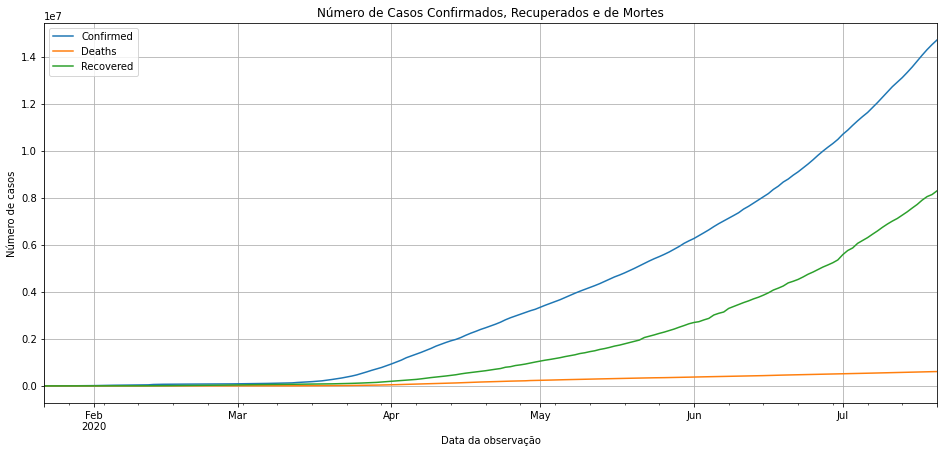

In [31]:
# Gráfico do Número de Casos Confirmados, Recuperados e de Mortes pela data de observação, todas as regiões foram somadas.

base.groupby(['ObservationDate'])['Confirmed'].sum().plot()
base.groupby(['ObservationDate'])['Deaths'].sum().plot()
base.groupby(['ObservationDate'])['Recovered'].sum().plot()
plt.title("Número de Casos Confirmados, Recuperados e de Mortes")
plt.xlabel("Data da observação")
plt.ylabel("Número de casos")
plt.legend()
plt.grid(True)

## Evolução de Casos Confirmados de Alguns Países

In [18]:
#Filtrando os dados
dados_br = base[(base['Country/Region'] == 'Brazil')]
dados_it = base[(base['Country/Region'] == 'Italy')]
dados_ge = base[(base['Country/Region'] == 'Germany')]
dados_fr = base[(base['Country/Region'] == 'France')]
dados_usa = base[(base['Country/Region'] == 'US')]

### Itália, Alemanha e França

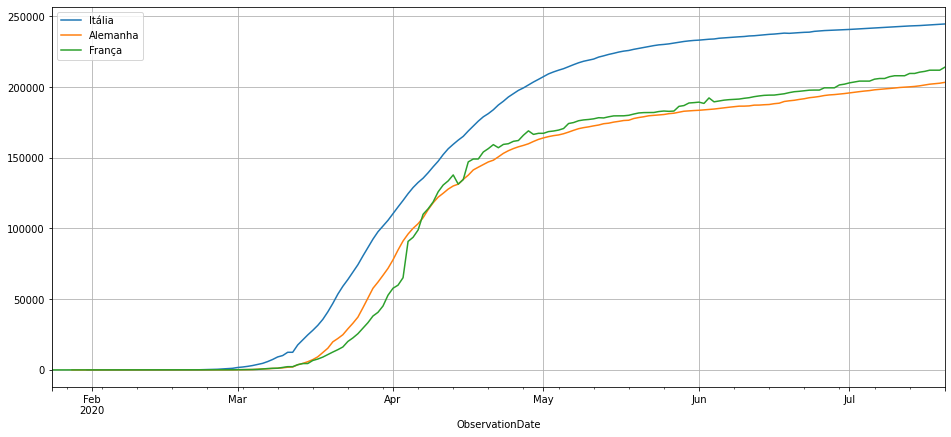

In [19]:
dados_it.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='Itália')
dados_ge.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='Alemanha')
dados_fr.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='França')
plt.legend()
plt.grid(True)

## EUA

In [20]:
dados_usa

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
68527,68528,2020-07-20,Virginia,US,2020-07-21 04:38:46,78375.0,2031.0,0.0
68535,68536,2020-07-20,Washington,US,2020-07-21 04:38:46,47743.0,1453.0,0.0
68537,68538,2020-07-20,West Virginia,US,2020-07-21 04:38:46,5084.0,100.0,0.0
68539,68540,2020-07-20,Wisconsin,US,2020-07-21 04:38:46,43018.0,846.0,0.0


### Brasil

In [14]:
dados_br

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
82,83,2020-01-23,NaN,Brazil,1/23/20 17:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26T23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29T21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
68408,68409,2020-07-20,Roraima,Brazil,2020-07-21 04:38:46,25686.0,431.0,8455.0
68425,68426,2020-07-20,Santa Catarina,Brazil,2020-07-21 04:38:46,54414.0,694.0,42569.0
68427,68428,2020-07-20,Sao Paulo,Brazil,2020-07-21 04:38:46,416434.0,19788.0,282391.0
68433,68434,2020-07-20,Sergipe,Brazil,2020-07-21 04:38:46,46059.0,1156.0,25099.0


## Brasil X USA

/home/jessica/Documentos/data_science/data/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
/home/jessica/Documentos/data_science/data/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


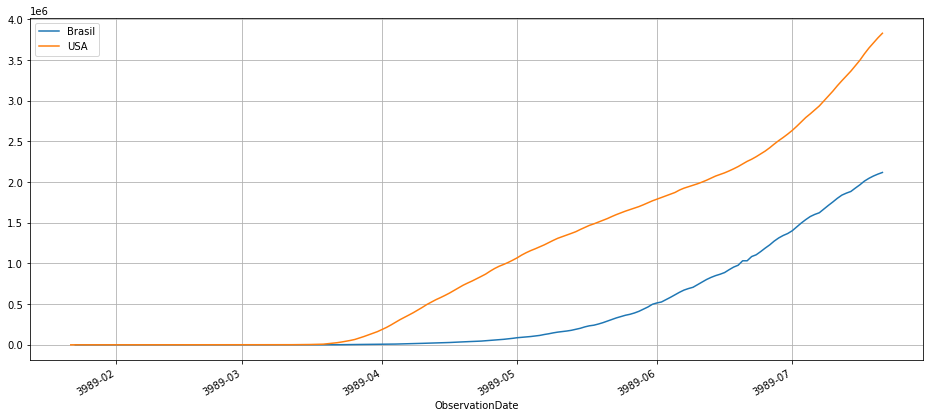

In [21]:
dados_br.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='Brasil')
dados_usa.groupby(['ObservationDate'])['Confirmed'].sum().plot(label='USA')
plt.legend()
plt.grid(True)